<a href="https://colab.research.google.com/github/PMabwa/airbnb-recommender-system/blob/kelvin2/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Recommender System

![Cape Town image](https://github.com/PMabwa/airbnb-recommender-system/blob/kelvin2/images/top-air-bnb-cape-town-south-africa.jpg?raw=1)

## Overview

This project aims to develop a data-driven model to analyze patterns in Airbnb listings and generate insights to optimize pricing, occupancy rates, and customer satisfaction for hosts in Cape Town. Using data from [Inside Airbnb](https://insideairbnb.com/get-the-data/), the model will be trained on various features such as property type, location, amenities, reviews, price, and host activity.

This system can benefit hosts, property managers, and tourism platforms by providing actionable insights into market trends and property performance. It will involve several stages, including data cleaning, exploratory data analysis (EDA), feature engineering, model selection, and evaluation.

Throughout the project, we will explore relationships between property features and key performance indicators, such as pricing and occupancy rates, to identify factors driving success. Advanced modeling techniques, such as regression analysis and machine learning models, will help predict optimal listing prices and understand the dynamics of customer behavior.

By developing a robust predictive model, this project can offer practical applications for the short-term rental market in Cape Town. Hosts and property managers can leverage these insights to improve competitiveness, enhance guest satisfaction, and optimize revenue management strategies.

## Business Understanding

The short-term rental industry is highly competitive, with Airbnb hosts and property managers striving to optimize occupancy rates, maximize revenue, and enhance guest satisfaction. Cape Town’s thriving tourism sector adds further pressure for hosts to stay competitive by offering well-priced, attractive listings with positive guest experiences.

A key challenge for hosts lies in setting optimal prices and maintaining high occupancy rates while delivering quality services. Factors such as location, amenities, and guest reviews play a significant role in determining a listing’s success. However, managing these elements manually can be complex and time-consuming, especially with market conditions that are constantly changing.

The business value of this project lies in its ability to provide hosts and property managers with actionable insights. By developing a model that can predict optimal listing prices and identify factors driving higher occupancy and guest satisfaction, this project can help improve revenue management and customer experience. These insights can empower hosts to make data-informed decisions, enhancing their market competitiveness and boosting profitability.

**Objective/ Business Problem:**

> ***Build a predictive model that analyzes Airbnb listings in Cape Town to identify patterns and provide insights into optimal pricing, occupancy rates, and guest satisfaction.***

## Data Understanding

The data used in this project can be found [here](https://insideairbnb.com/get-the-data/). It is sourced from [`insideairbnb.com`](https://insideairbnb.com) and contains detailed information about Airbnb listings in Cape Town. The dataset provides insights into various aspects of each listing, including property details, host information, pricing, reviews, and availability.

Given the dataset contains ***87*** columns, listing them all here would be impractical. For a full description of the features and their meanings, please refer to the comprehensive feature list available in this [Google Doc](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=1322284596#gid=1322284596).

The key data files are as follows:

1. `listings.csv` – Contains detailed information about each property listing. Each record represents one listing and includes features such as property type, price, location, and review scores.
2. `calendar.csv` – Provides availability and pricing data for each listing across multiple dates.
3. `reviews.csv` – Contains individual reviews left by guests, along with the date of the review and guest details.

Each listing is uniquely identified across files, allowing for merging and analysis across datasets. This rich, multi-dimensional data will enable us to extract valuable insights into factors influencing pricing, occupancy, and guest satisfaction.

## Data Preparation and Cleaning

In this section, we are going to do the following:

1. Import the necessary libraries.
2. Preview data and ensure they are of correct datatypes.
3. Load our datasets and merge them to have a final unified dataset.
4. Check for missing values & handle them.
5. Check for duplicates & handle them.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from wordcloud import WordCloud
from collections import Counter
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
import nltk
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# # load the datasets
# # load calendar
# calendar_df = pd.read_csv('/content/calendar.csv.gz', compression='gzip', low_memory=False)
# calendar_df.head()

In [2]:
# load listings
listings_df = pd.read_csv('/content/listings.csv.gz', compression='gzip')
listings_df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
1,298622,https://www.airbnb.com/rooms/298622,20240629050116,2024-06-29,city scrape,Stunning Sea View apt on the Cape Peninsula,"This light, airy, well equipped self-catering...","The area is very beautiful, with sea and mount...",https://a0.muscache.com/pictures/3547300/40a29...,1539169,...,4.99,4.87,4.89,NaN,f,1,1,0,0,0.47


In [3]:
listings_df.isna().sum()

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
...,...
calculated_host_listings_count,0
calculated_host_listings_count_entire_homes,0
calculated_host_listings_count_private_rooms,0
calculated_host_listings_count_shared_rooms,0


In [4]:
listings_df.dropna(subset=['reviews_per_month'], inplace=True)

In [5]:
# load reviews
reviews_df = pd.read_csv('/content/reviews.csv.gz', compression='gzip')
reviews_df.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3191,4888238,2013-05-31,5737473,Kathleen,Great home away from home! Bridgette and Marth...
1,3191,9128602,2013-12-09,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...


In [6]:
reviews_df.isna().sum()

,0
listing_id,0
id,0
date,0
reviewer_id,0
reviewer_name,1
comments,117


In [7]:
reviews_df.dropna(inplace=True)

In [8]:
# Merging dataframes
# Merge listings_df with reviews_df using 'id' from listings_df and 'listing_id' from reviews_df
capetown_airbnb_df = pd.merge(listings_df, reviews_df, left_on='id', right_on='listing_id')
capetown_airbnb_df.head(2)

,id_x,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,1,0,0,0.59,3191,4888238,2013-05-31,5737473,Kathleen,Great home away from home! Bridgette and Marth...
1,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,1,0,0,0.59,3191,9128602,2013-12-09,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...


In [9]:
# check for duplicates
capetown_airbnb_df.duplicated().sum()

0

Next, we check for duplicates. There were none.

In [10]:
capetown_airbnb_df.isna().sum()

,0
id_x,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
...,...
id_y,0
date,0
reviewer_id,0
reviewer_name,0


Next, we check for null values. There were none.

In [11]:
capetown_airbnb_df.columns

Index(['id_x', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', '

In [12]:
# average out the ratings columns to 1 column 'avg_rating'
# columns to average
rating_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication',
                  'review_scores_location', 'review_scores_value']

# Create new column 'avg_rating' which is the row-wise mean of the selected columns
capetown_airbnb_df['avg_rating'] = capetown_airbnb_df[rating_columns].mean(axis=1)

In [13]:
# Verify the new column
print(capetown_airbnb_df[['avg_rating']].tail(100))

        avg_rating
560220    4.928571
560221    4.928571
560222    5.000000
560223    5.000000
560224    5.000000
...            ...
560315    5.000000
560316    5.000000
560317    5.000000
560318    5.000000
560319    5.000000

[100 rows x 1 columns]


In [14]:
# print columns in `capetown_airbnb_df`
capetown_airbnb_df.columns

Index(['id_x', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', '

In [15]:
# drop unnecessary columns in `capetown_airbnb_df`
columns_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_since',
                   'host_location', 'host_about', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
                    'host_has_profile_pic', 'neighbourhood_group_cleansed',
                   'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                   'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
                   'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews_ltm',
                   'number_of_reviews_l30d', 'first_review', 'last_review', 'license', 'calculated_host_listings_count',
                   'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                   'reviews_per_month', 'reviewer_id', 'listing_id', 'id_y', 'reviewer_name', 'review_scores_rating', 'review_scores_accuracy',
                   'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

capetown_airbnb_df = capetown_airbnb_df.drop(columns=columns_to_drop)

In [16]:
capetown_airbnb_df.columns

Index(['id_x', 'name', 'description', 'neighborhood_overview', 'host_id',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'number_of_reviews', 'instant_bookable',
       'date', 'comments', 'avg_rating'],
      dtype='object')

In [17]:
capetown_airbnb_df.isna().sum()

,0
id_x,0
name,0
description,4385
neighborhood_overview,101305
host_id,0
host_response_time,62884
host_response_rate,62884
host_is_superhost,28396
host_listings_count,0
host_total_listings_count,0


In [18]:
# drop null values
capetown_airbnb_df.dropna(inplace=True)

In [19]:
capetown_airbnb_df.isna().sum()

,0
id_x,0
name,0
description,0
neighborhood_overview,0
host_id,0
host_response_time,0
host_response_rate,0
host_is_superhost,0
host_listings_count,0
host_total_listings_count,0


## EDA

### Univariate Analysis

In [20]:
# Convert 'date' to datetime format
capetown_airbnb_df['date'] = pd.to_datetime(capetown_airbnb_df['date'])

# Count occurrences of each date
date_counts = capetown_airbnb_df['date'].value_counts().sort_index()
date_counts

,count
date,
2010-06-15,1
2010-06-20,1
2010-12-14,1
2011-03-12,1
2011-08-24,1
...,...
2024-06-25,81
2024-06-26,66
2024-06-27,35


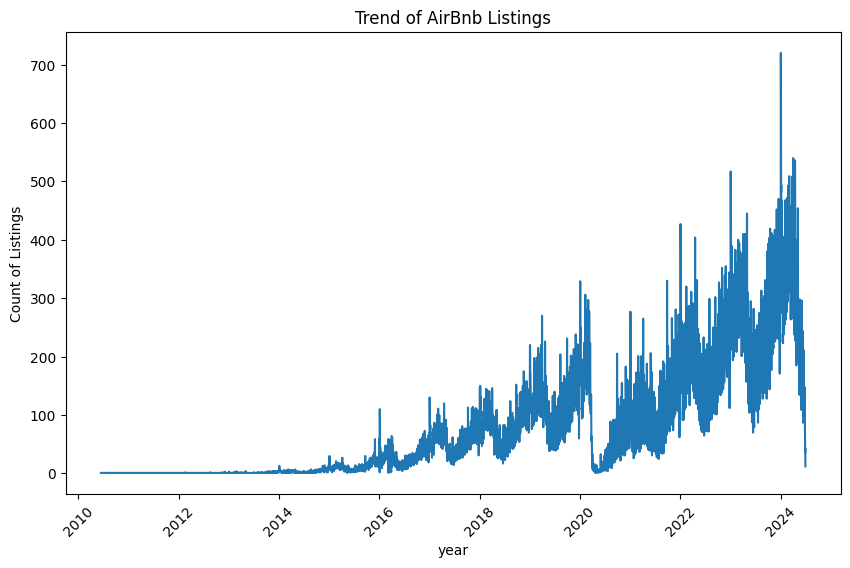

In [21]:
# Create a line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=date_counts.index, y=date_counts.values)

# Add labels and title
plt.xlabel('year')
plt.ylabel('Count of Listings')
plt.title('Trend of AirBnb Listings')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show();

This line plot shows that AirBnb listings has increased over the years.

### Host Response Time

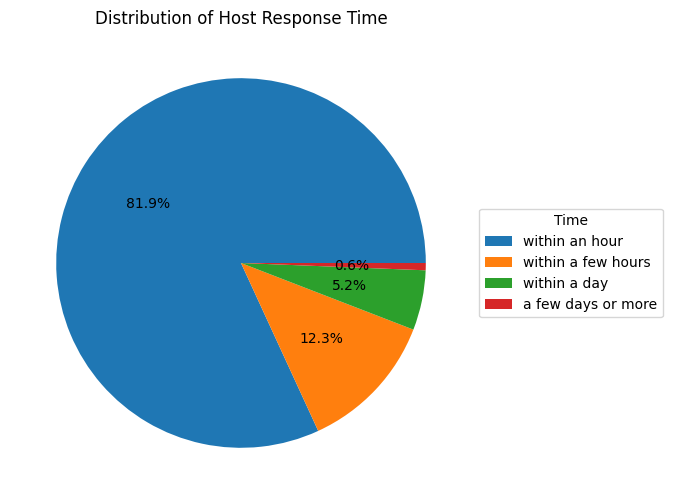

In [22]:
plt.figure(figsize=(10,6))
plt.pie(capetown_airbnb_df.host_response_time.value_counts(), autopct='%1.1f%%')
plt.title('Distribution of Host Response Time')
plt.legend(labels = capetown_airbnb_df.host_response_time.value_counts().index, title="Time", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

The pie chart above shows that most hosts respond quickly, with the vast majority (82%) responding within an hour, which could be a key selling point for Airbnb customers looking for prompt communication.

### Superhost Distribution

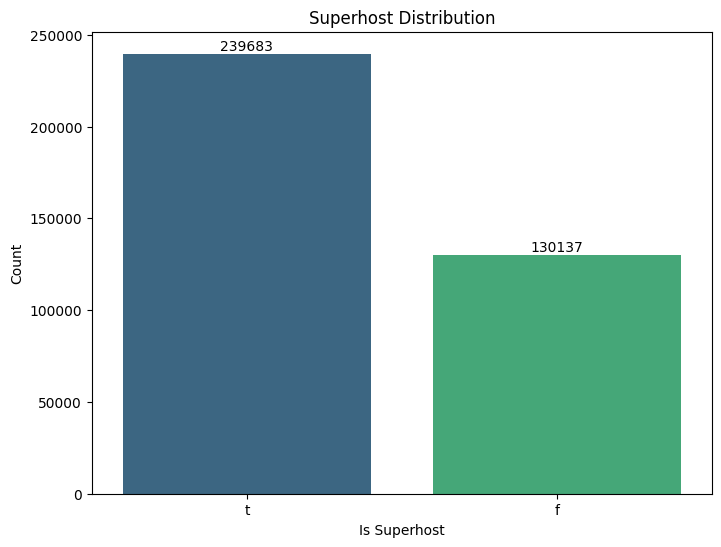

In [23]:
# Create the barplot
plt.figure(figsize=(8,6))

x = capetown_airbnb_df.host_is_superhost.value_counts().index
y = capetown_airbnb_df.host_is_superhost.value_counts().values

sns.barplot(x=x, y=y, palette='viridis')

# Add values on top of the bars
for i in range(len(x)):
    plt.text(i, y[i] + 50, str(y[i]), ha='center', va='bottom')

# Add title and labels
plt.title('Superhost Distribution')
plt.ylabel('Count')
plt.xlabel('Is Superhost')

# Display the plot
plt.show()

The bar chart above shows that most of the host are Superhosts (239683).

### Host Verifications

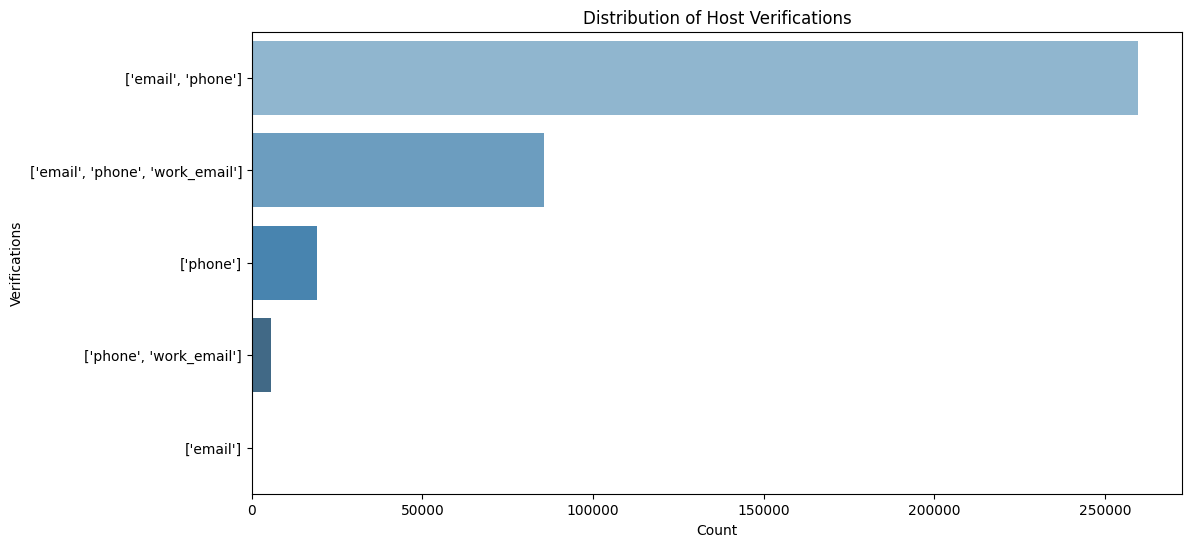

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x=capetown_airbnb_df.host_verifications.value_counts().values, y=capetown_airbnb_df.host_verifications.value_counts().index, palette="Blues_d")
plt.title('Distribution of Host Verifications')
plt.ylabel('Verifications')
plt.xlabel('Count')
plt.show()

The bar chart above shows that the majority of Airbnb hosts are verified using both email and phone, with over 300,000 instances, while fewer hosts use additional verification methods like work email.

### Host ID Verification

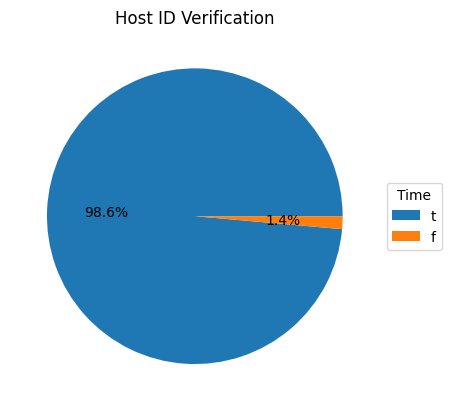

In [25]:
plt.pie(capetown_airbnb_df.host_identity_verified.value_counts(), autopct='%1.1f%%')
plt.title('Host ID Verification')
plt.legend(labels = capetown_airbnb_df.host_identity_verified.value_counts().index, title="Time", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

The pie chart above shows that 98.6% of AirBnb hosts are verified hence can be trusted.

### Neighbourhood

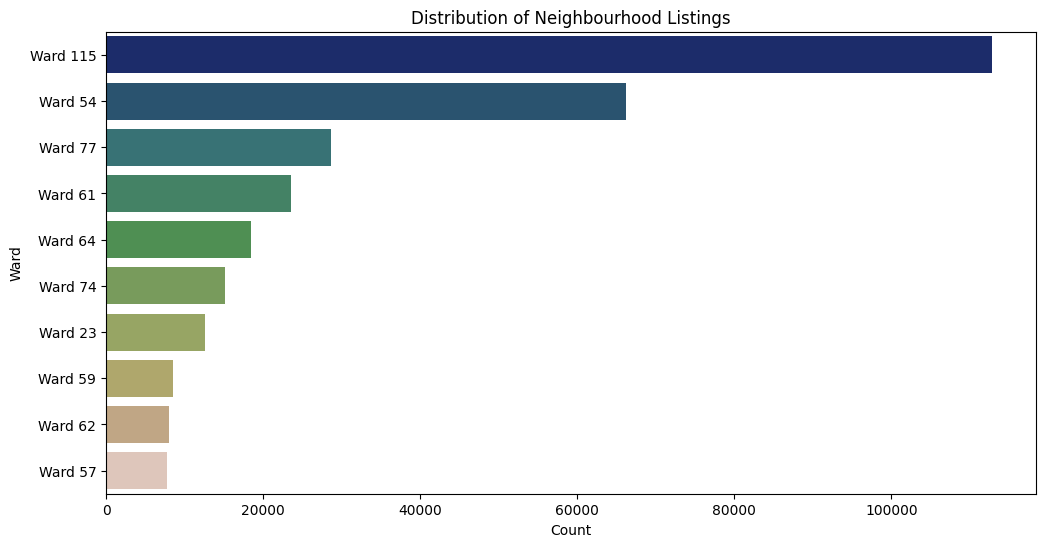

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x=capetown_airbnb_df.neighbourhood_cleansed.value_counts().values[:10], y=capetown_airbnb_df.neighbourhood_cleansed.value_counts().index[:10], palette="gist_earth")
plt.title('Distribution of Neighbourhood Listings')
plt.ylabel('Ward')
plt.xlabel('Count')
plt.show()

The bar chart above shows that Ward 115 (138191 listings), Ward 54 (78705 listings) and Ward 77 (32032 listings) have the most listings.

### Area Visualization Heatmap

In [28]:
# use MarkerCluster
from folium.plugins import MarkerCluster

# Create map
map_center = [-33.9249, 18.4241]
m = folium.Map(location=map_center, zoom_start=12)

# Create a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add points to the cluster layer
for idx, row in capetown_airbnb_df.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=row['name']
    ).add_to(marker_cluster)

# Display map
m

Buffered data was truncated after reaching the output size limit.

In [29]:
from folium.plugins import HeatMap

# Create list of points
points = capetown_airbnb_df[['latitude', 'longitude']].values.tolist()

# Add heatmap layer
HeatMap(points).add_to(m)

In [ ]:
# Save the map
m.save('my_heatmap.html')

![Heatmap image](https://github.com/PMabwa/airbnb-recommender-system/blob/kelvin2/images/heatmap.png?raw=1)

- The heatmap above shows that the highest concentration (297594 listings) appears to be in the central Cape Town area.

- Airbnbs are heavily concentrated in the tourist-friendly coastal areas and city center, with significantly less activity in the inland regions.

### Property Type

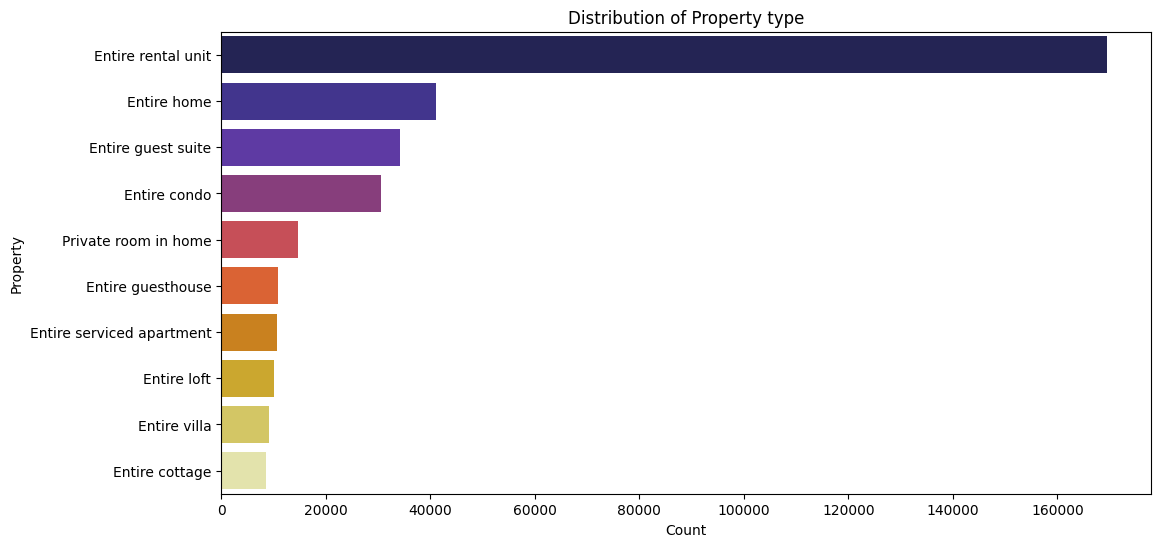

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x=capetown_airbnb_df.property_type.value_counts().values[:10], y=capetown_airbnb_df.property_type.value_counts().index[:10], palette="CMRmap")
plt.title('Distribution of Property type')
plt.ylabel('Property')
plt.xlabel('Count')
plt.show()

The bar chart above that the majority of Airbnb listings in Cape Town are entire rental units (213788), followed by entire homes (48651), while other property types like guest suites, condos, and private rooms have significantly lower representation.


### Trend in price

Next, we'll create a line chart to show trends over time. We'll group the data by month. first, let's extract the month from the date column.

In [32]:
capetown_airbnb_df['price'] = capetown_airbnb_df['price'].replace('[$,]', '', regex=True).astype(float).astype(int)

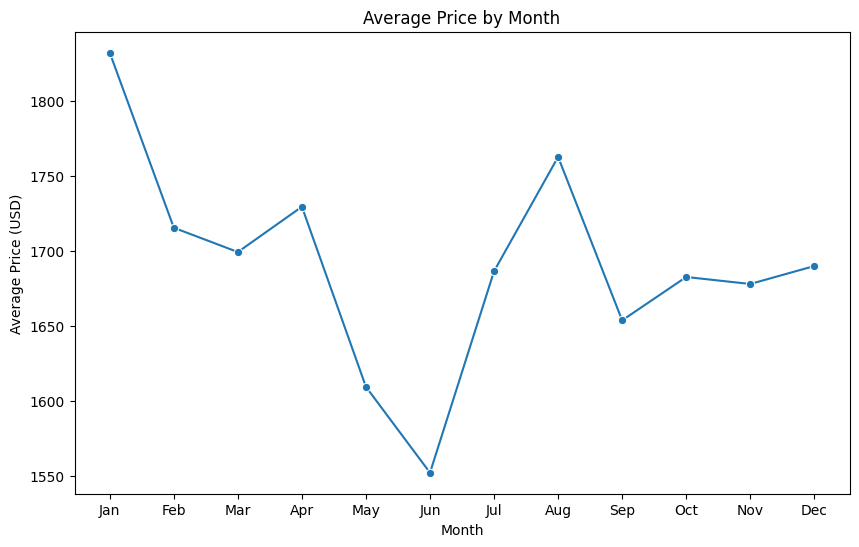

In [33]:
# month
capetown_airbnb_df['month'] = capetown_airbnb_df['date'].dt.month

# Calculate average price per month
avg_price_per_month = capetown_airbnb_df.groupby('month')['price'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10,6))
sns.lineplot(x='month', y='price', data=avg_price_per_month, marker='o')

# labels and title
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price (USD)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Show the plot
plt.show();

The line chart above shows the average Airbnb prices in Cape Town month-by-month. Key trends:

1. January: Peaks around 1850 USD, likely due to high tourist season and summer holidays.

2. February to March: Prices drop significantly as the holiday season ends and demand decreases.

3. April to May: Fluctuation continues, leading to a low in June (~1500 USD), coinciding with the cooler, off-peak travel season.

4. July to August: Sharp rise, peaking in August, possibly due to winter events and regional holidays.

5. September to October: Prices dip again, reflecting a lull before the spring and summer uptick.

6. November to December: Slight upward trend as summer returns and holiday bookings start to pick up again.

### Average Price by Season

Now, we'll analyze seasonal variations in prices. First, we'll create a season column based on the listing dates, then use a bar plot to visualize the average price for each season. We'll cetegorize each month into a season (winter, spring, summer, fall).

In [34]:
# Ensuring date column is in datetime format
capetown_airbnb_df['date'] = pd.to_datetime(capetown_airbnb_df['date'])

# function to categorize seasons
def get_season(month):
    if month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'
    elif month in [12, 1, 2]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a 'season' column
capetown_airbnb_df['season'] = capetown_airbnb_df['date'].dt.month.apply(get_season)

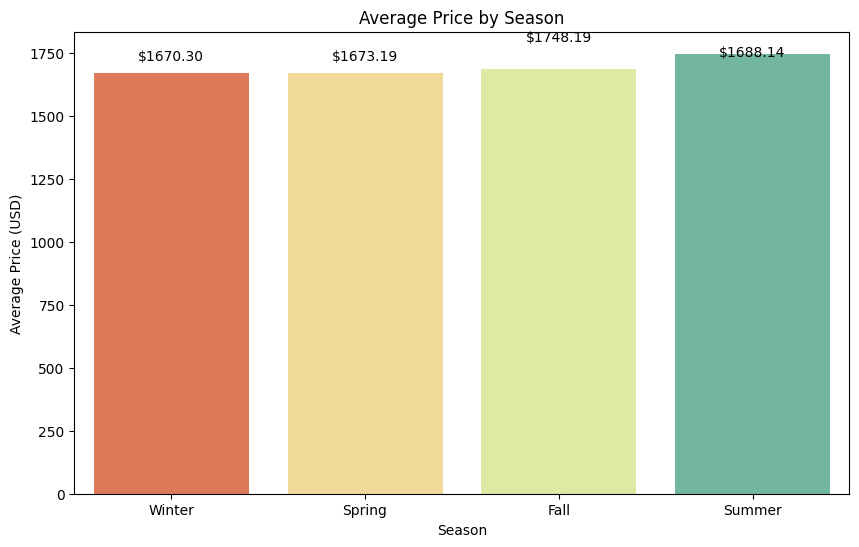

In [35]:
# Calculate average price per season
avg_price_per_season = capetown_airbnb_df.groupby('season')['price'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall']).reset_index().sort_values(by='price')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='season', y='price', data=avg_price_per_season, palette='Spectral')

# Add labels on each bar
for index, row in avg_price_per_season.iterrows():
    barplot.text(x=index, y=row['price'] + 50, s=f"${row['price']:.2f}", ha='center', color='black')

# Add labels and title
plt.title('Average Price by Season')
plt.xlabel('Season')
plt.ylabel('Average Price (USD)')

plt.show()

The bar chart above shows the average Airbnb prices in Cape Town by season.

Key insights:

1. Summer: Highest average price, around 1748 USD, indicating peak tourist season and high demand.

2. Fall: Average price of 1688 USD, suggesting continued strong interest.

3. Spring: Close to Fall with an average of 1673 USD, possibly due to milder weather and events.

4. Winter: Lowest average price, around 1670 USD, reflecting the off-peak season with fewer visitors.

The chart highlights that Summer is the most expensive time for Airbnb stays, likely driven by high tourist influx.

### Distribution of Price

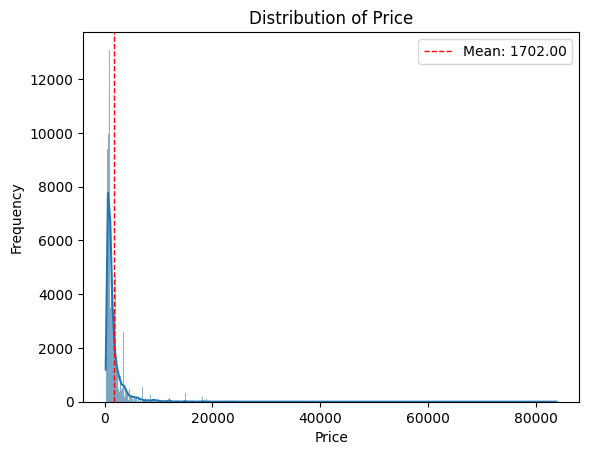

In [36]:
# mean of the 'price' column
mean_value = capetown_airbnb_df['price'].mean()

# histogram
sns.histplot(capetown_airbnb_df['price'], kde=True)

# Add a vertical line at the mean
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')

# Add legend and labels
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

plt.show();

The KDE of the histogram above shows that the average price of Airbnbs in CapeTown is 1702 USD.

### Instant Bookable

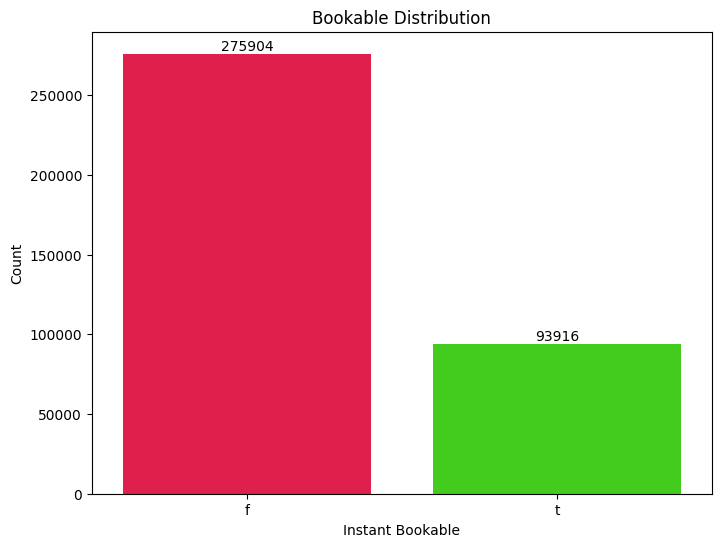

In [37]:
# Create the barplot
plt.figure(figsize=(8,6))

x = capetown_airbnb_df.instant_bookable.value_counts().index
y = capetown_airbnb_df.instant_bookable.value_counts().values

sns.barplot(x=x, y=y, palette='prism_r')

# Add values on top of the bars
for i in range(len(x)):
    plt.text(i, y[i] + 50, str(y[i]), ha='center', va='bottom')

# Add title and labels
plt.title('Bookable Distribution')
plt.ylabel('Count')
plt.xlabel('Instant Bookable')

# Display the plot
plt.show()

- Larger portion of listings (326,965) are not instantly bookable ("f"), while a smaller number (123,225) are available for instant booking ("t").

- Many hosts may choose not to offer instant booking to maintain control over their guest selection, allowing them to screen guests, manage booking dates more effectively, or communicate specific rules before confirming a reservation.


## Bivariate Analysis

### Price v. Average Rating

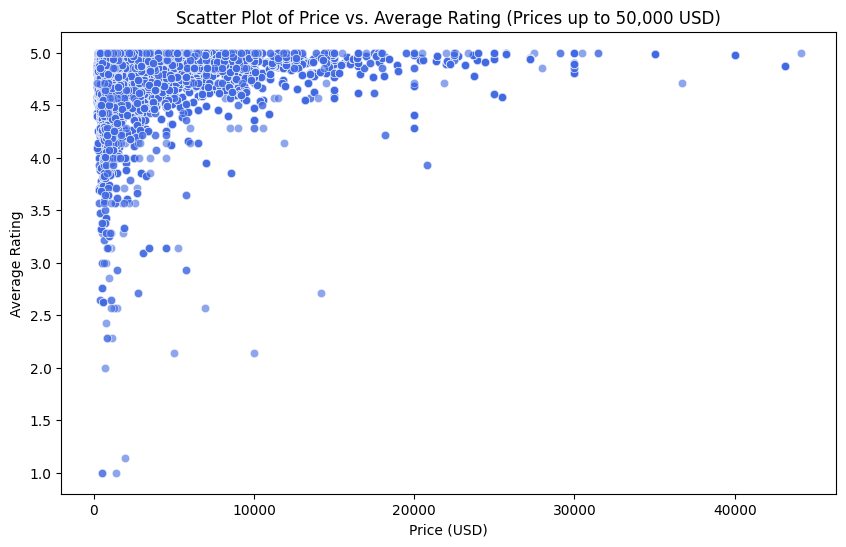

In [38]:
# Create a scatter plot to visualize the relationship between price and avg_rating
# Convert the 'price' column to numeric and remove $ sign
capetown_airbnb_df['price'] = capetown_airbnb_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Filter df to include only listings with a price of up to USD 50,000
filtered_df = capetown_airbnb_df[capetown_airbnb_df['price'] <= 50000]

# Create scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with a soft blue color and transparency for better visual appeal
sns.scatterplot(x='price', y='avg_rating', data=filtered_df, color='royalblue', alpha=0.6)

# labels,title
plt.title('Scatter Plot of Price vs. Average Rating (Prices up to 50,000 USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Average Rating')
plt.show()

This scatter plot shows the relationship between the price (in USD) and the average rating of properties, with prices up to 50,000 USD.

Key observations:

- The majority of properties, regardless of price, have high average ratings, clustering around 4.0 to 5.0.
- Fewer properties have lower average ratings (below 3.0), spread across various price points.
- No clear trend indicates that higher prices correlate with higher average ratings or vice versa.
- There's a dense concentration of items with prices below 2,000 USD and ratings between 4.0 and 5.0.

This scatter plot shows that high ratings are common across a wide range of prices.

### Price v. Property Type

In [39]:
# group property and price to see the correlation
property_price = capetown_airbnb_df.groupby('property_type')['price'].mean().sort_values(ascending=False)
property_price.head()

,price
property_type,
Entire villa,8349.156880
Entire home,3317.354410
Barn,2755.000000
Entire bungalow,2743.811584
Entire cabin,2496.771400


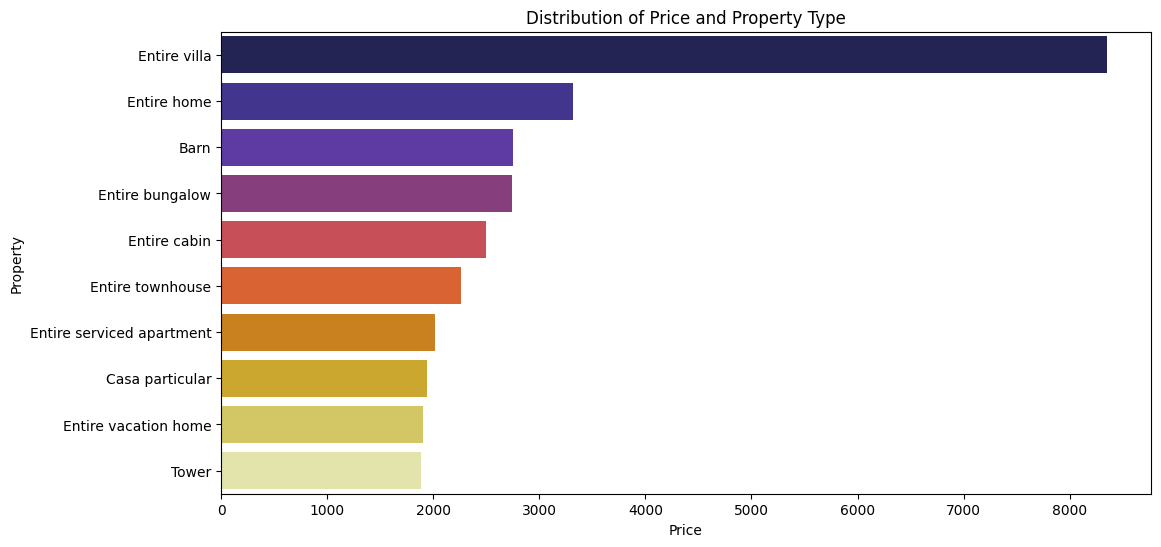

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x=property_price.values[:10], y=property_price.index[:10], palette="CMRmap")
plt.title('Distribution of Price and Property Type')
plt.ylabel('Property')
plt.xlabel('Price')
plt.show()

The bar chart above shows that booking an entire villa is the most expensive with (over $8000), followed by the entire home and Barn.

### Average Ratings of Superhosts vs. Non-Superhosts

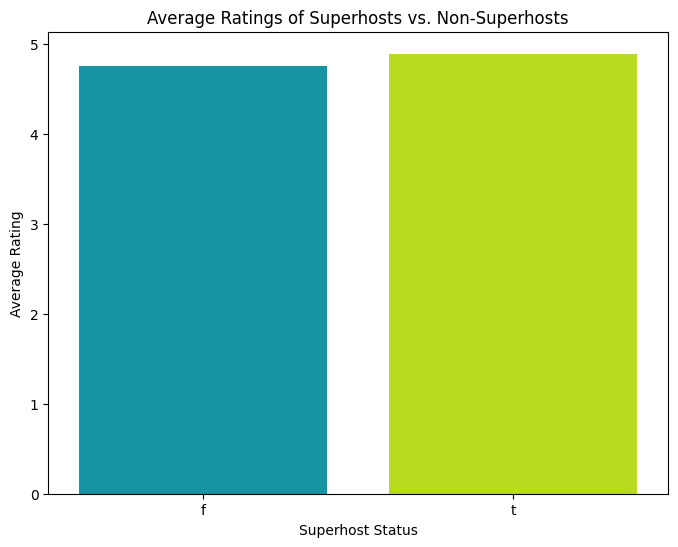

In [41]:
# bar chart to compare avg_rating between superhosts and non-superhosts
# Calculate the mean avg_rating for superhosts and non-superhosts
avg_ratings = capetown_airbnb_df.groupby('host_is_superhost')['avg_rating'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='host_is_superhost', y='avg_rating', data=avg_ratings, palette='nipy_spectral')

# labels, title
plt.title('Average Ratings of Superhosts vs. Non-Superhosts')
plt.xlabel('Superhost Status')
plt.ylabel('Average Rating')
plt.show()

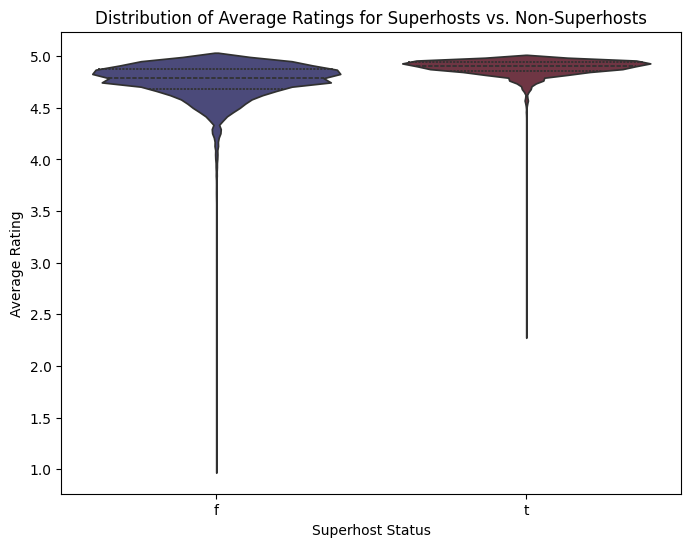

In [42]:
# violin plot to compare avg_rating between superhosts and non-superhosts
plt.figure(figsize=(8, 6))
sns.violinplot(x='host_is_superhost', y='avg_rating', data=capetown_airbnb_df, inner='quartile', palette='icefire')

# labels and title
plt.title('Distribution of Average Ratings for Superhosts vs. Non-Superhosts')
plt.xlabel('Superhost Status')
plt.ylabel('Average Rating')
plt.show()

The above plot shows that superhosts have ratings that are more concentrated towards the higher end, close to 5.0, indicating consistently high ratings. For Non-superhosts, their ratings are more spread out, with some tailing towards lower ratings, showing a wider variation in guest satisfaction. This suggests that superhosts generally receive higher and more consistent ratings compared to non-superhosts.

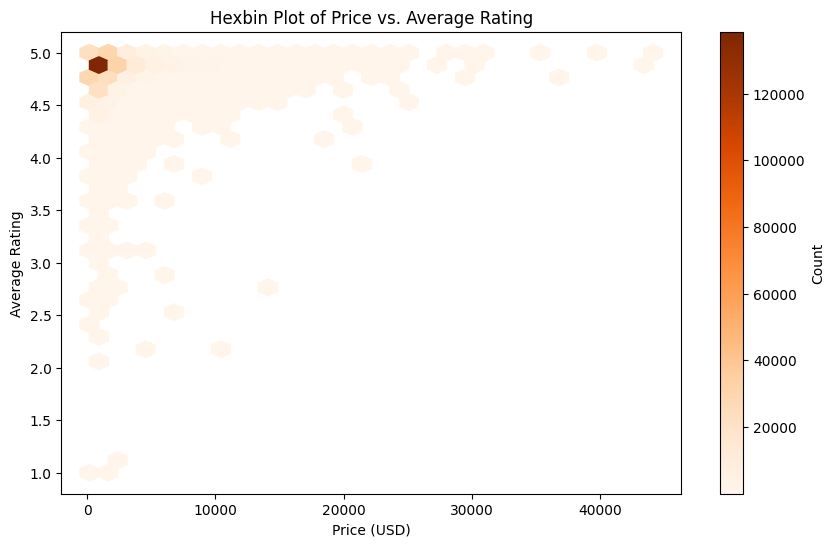

In [43]:
# hexbin plot to visualize the relationship between price and avg_rating
plt.figure(figsize=(10, 6))
plt.hexbin(filtered_df['price'], filtered_df['avg_rating'], gridsize=30, cmap='Oranges', mincnt=1)

# color bar, labels, title
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Price vs. Average Rating')
plt.xlabel('Price (USD)')
plt.ylabel('Average Rating')
plt.show()

Key insights from the hexbin plot above:

- Concentration of High Ratings: There's a high density of properties with prices between 0 and 2,000 USD, which have average ratings between 4.5 and 5.0.
- Higher Prices, Fewer Data Points: As the price increases, the density of data points decreases, indicating fewer properties are available at higher price ranges.

In essence, most highly rated properties are clustered in the lower price range.

In [52]:
# Calculate Q1 and Q3 for the 'price' column
Q1 = capetown_airbnb_df['price'].quantile(0.25)
Q3 = capetown_airbnb_df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers based on the IQR rule
capetown_airbnb_df_no_outliers = capetown_airbnb_df[(capetown_airbnb_df['price'] >= lower_bound) & (capetown_airbnb_df['price'] <= upper_bound)]

print(f"Removed {capetown_airbnb_df.shape[0] - capetown_airbnb_df_no_outliers.shape[0]} outliers from 'price'")

Removed 37080 outliers from 'price'


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
# Step 1: Aggregate data to avoid duplicate rows caused by multiple reviews
capetown_aggregated_df = (
    capetown_airbnb_df_no_outliers
    .groupby('id_x')
    .agg({
        'host_response_rate': 'first',  # Host-related features are constant per listing
        'host_is_superhost': 'first',
        'host_listings_count': 'first',
        'accommodates': 'mean',
        'bathrooms': 'mean',
        'bedrooms': 'mean',
        'beds': 'mean',
        'price': 'first',
        'avg_rating': 'mean',
        'number_of_reviews': 'sum',
    })
    .reset_index()
)

# Step 2: Clean 'host_response_rate' by removing '%' and converting to numeric
capetown_aggregated_df['host_response_rate'] = (
    capetown_aggregated_df['host_response_rate']
    .str.rstrip('%')  # Remove '%' symbol
    .astype(float) / 100  # Convert to float and scale to [0, 1]
)

# Step 3: Clip price values to a maximum of 10,000
capetown_aggregated_df['price'] = capetown_aggregated_df['price'].clip(upper=10000)

# Step 4: Handle missing data (simple imputation)
capetown_aggregated_df.fillna(0, inplace=True)

# Step 5: Convert categorical features to numerical (One-Hot Encoding)
capetown_encoded_df = pd.get_dummies(capetown_aggregated_df,
                                     columns=['host_is_superhost'])

# Step 6: Define features (X) and target variable (y)
X = capetown_encoded_df.drop(['id_x', 'price'], axis=1)  # Exclude ID and target column
y = capetown_encoded_df['price']

# Step 7: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train the baseline Linear Regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Step 9: Make predictions on both the training and test sets
y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)

# Step 10: Evaluate the baseline model with RMSE for both train and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Baseline Model Train RMSE: {train_rmse}")
print(f"Baseline Model Test RMSE: {test_rmse}")
print(f"Baseline Model R^2 Score: {r2}")

Baseline Model Train RMSE: 562.3511630696865
Baseline Model Test RMSE: 536.7938023359711
Baseline Model R^2 Score: 0.41631542521987364
